In [8]:
# import libraries and load dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/heart.csv") # load dataset

In [9]:
df.info() # basic info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   float64
 1   sex                  1190 non-null   float64
 2   chest_pain_type      1190 non-null   float64
 3   resting_bp_s         1190 non-null   float64
 4   cholesterol          1190 non-null   float64
 5   fasting_blood_sugar  1190 non-null   float64
 6   resting_ecg          1190 non-null   float64
 7   max_heart_rate       1190 non-null   float64
 8   exercise_angina      1190 non-null   float64
 9   oldpeak              1190 non-null   float64
 10  st_slope             1190 non-null   float64
 11  target               1190 non-null   float64
dtypes: float64(12)
memory usage: 111.7 KB


In [10]:
df.describe() # Statistical Summary

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [11]:
df.isnull().sum()    # check if there is null/ missing values

,0
age,0
sex,0
chest_pain_type,0
resting_bp_s,0
cholesterol,0
fasting_blood_sugar,0
resting_ecg,0
max_heart_rate,0
exercise_angina,0
oldpeak,0


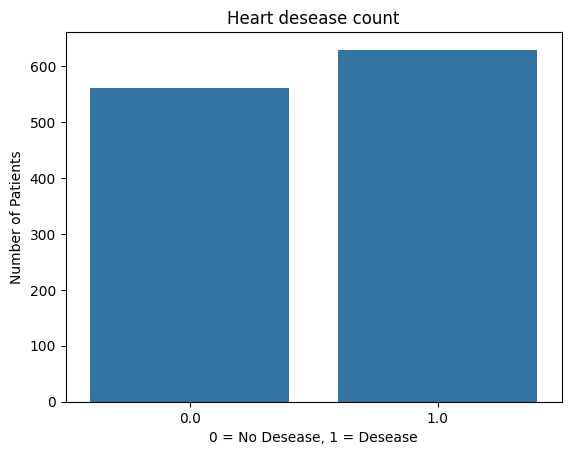

In [12]:
# countplot for target desease (0 = no heart desease, 1 = has heart desease)
sns.countplot(data = df, x = "target")
plt.title("Heart desease count")
plt.xlabel("0 = No Desease, 1 = Desease")
plt.ylabel("Number of Patients")
plt.show()

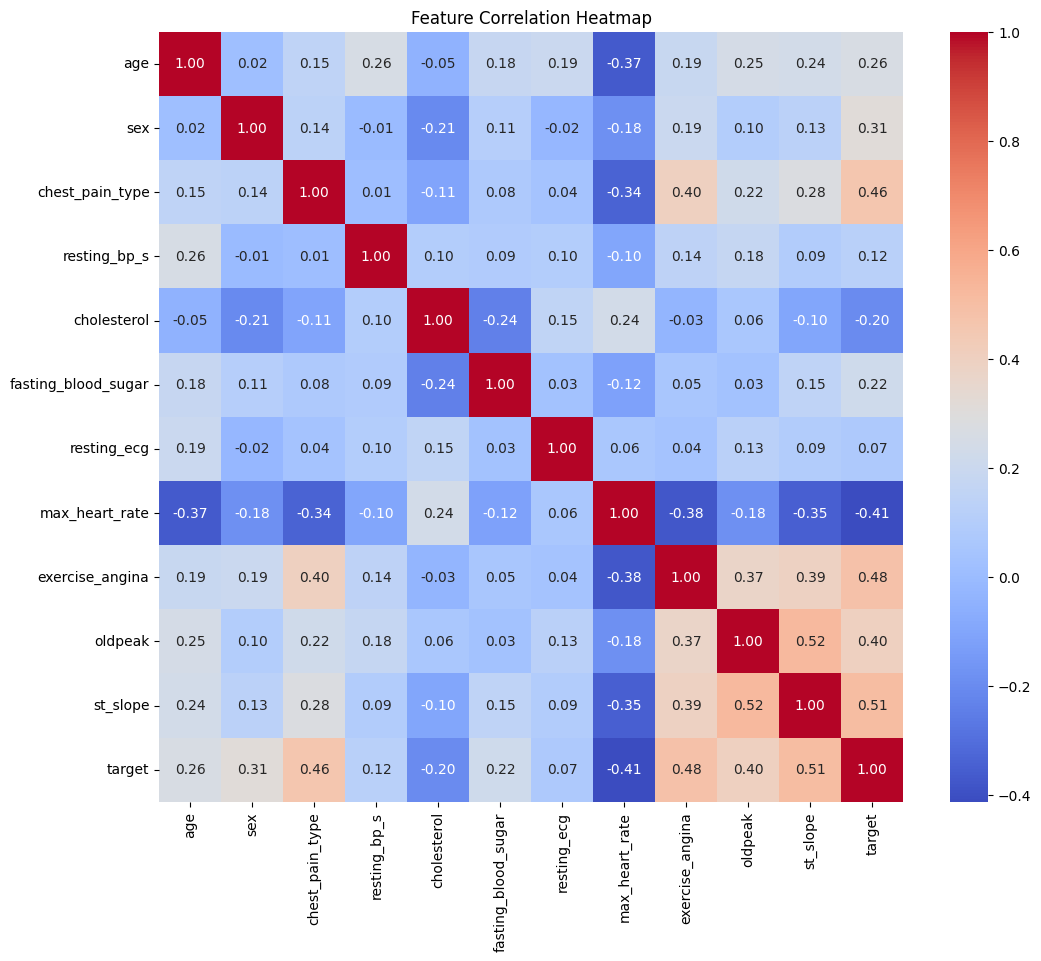

In [13]:
# Display how strongly feature relate to each other and to 'target'
plt.figure(figsize=(12, 10)) #Adjust size of figure
sns.heatmap(df.corr(), annot = True, fmt=".2f", cmap = "coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [14]:
# Model training and prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [16]:
# Split the dataset into feature(x) and target(y)
# Split input features and target(y)
x = df.drop("target", axis=1) # All columns except target
y = df["target"] # Only the target columns

Why?
We want the model to learn using feature(x) and predict target(y)

Split into Training and Test Sets

In [17]:
# Split data: 80% for training, 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [21]:
# Create the model and train it
model = LogisticRegression(max_iter=5000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=5000)

Make Predictions

In [22]:
# Predict using the trained model
y_pred = model.predict(x_test)

Evaluate the model

In [23]:
# Print Accuracy Score
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Confussion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfussion matrix\n", cm)

# Classification Report (precision, recall, f1-score)
print("\nClassification Report\n", classification_report(y_test, y_pred))


Accuracy:  0.8613445378151261

Confussion matrix
 [[ 90  17]
 [ 16 115]]

Classification Report
               precision    recall  f1-score   support

         0.0       0.85      0.84      0.85       107
         1.0       0.87      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238



Get Feature Importance from Logistic Regression

In [24]:
# Get model coefficients (Importance of each feature)
importance = model.coef_[0]

# Match them with feature names
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Display
print(feature_importance)

                Feature  Importance
10             st_slope    1.224422
1                   sex    1.209013
8       exercise_angina    0.981098
2       chest_pain_type    0.763245
5   fasting_blood_sugar    0.752589
9               oldpeak    0.346488
6           resting_ecg    0.051609
0                   age    0.025028
3          resting_bp_s    0.003407
4           cholesterol   -0.002418
7        max_heart_rate   -0.012006


Plot Feature Importance

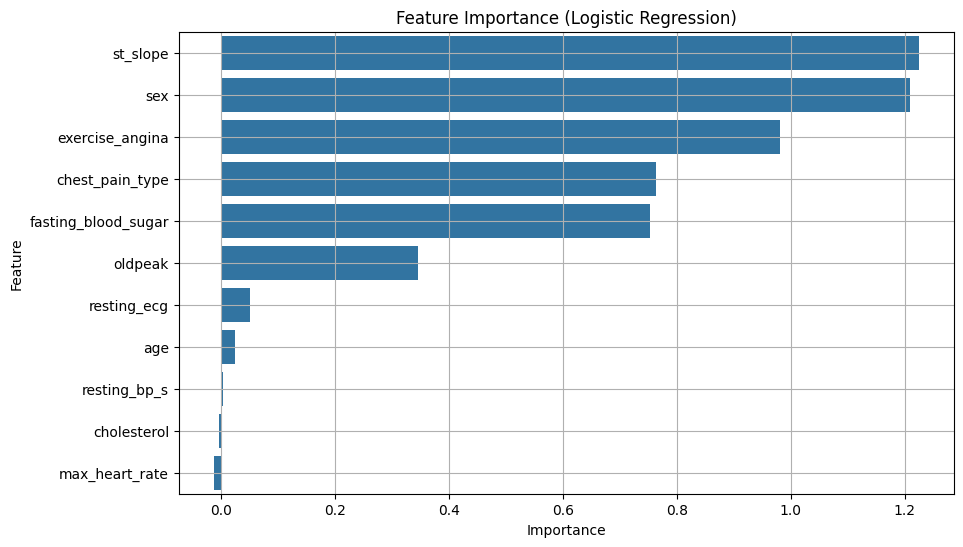

In [25]:
# Plot top features
plt.figure(figsize=(10, 6)) # Size of the figure
sns.barplot(x='Importance', y='Feature', data= feature_importance)
plt.title('Feature Importance (Logistic Regression)')
plt.grid(True)
plt.show()